# <div align="center"><b> Desafio 2 - Procesamiento del lenguaje Natural - CEIA </b></div>


<div align="right">📝 <em><small><font color='Gray'>Nota:</font></small></em></div>

<div align="right"> <em><small><font color='Gray'> La funcionalidad de visualización de jupyter notebooks en <a href="https://github.com/" target="_blank">github</a> es solamente un preview.</font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Para mejor visualización se sugiere utilizar el visualizador recomndado por la comunidad: <a href="https://nbviewer.org/" target="_blank">nbviewer</a></font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Puedes a acceder al sigiente enlace para ver este notebook en dicha página: <a href="(https://nbviewer.org/github/brunomaso1/uba-ceia/blob/ceia-nlp/ceia-nlp/Desafio%202.ipynb">Desafio 2</a></font></small></em> </div>


---


<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>


<div align="center"><img src="./resources/Desafio_2_portada.jpeg" width="600" alt="Figura 1: A data scientist is working on embedding using the Lord of the Rings lore. The image is dark and moody, with a focus on the scientist's computer screen. The screen displays a visualization of the embedding, with a map of Middle Earth in the background. The scientist is wearing a white lab coat and glasses, and is intently focused on the screen. The room is dimly lit, with a few books and papers scattered on the desk. The overall mood is one of intense concentration and intellectual curiosity. - Generada con Microsoft Image Creator"></div>

<div align="center"><small><em>Figura 1: A data scientist is working on embedding using the Lord of the Rings lore. The image is dark and moody, with a focus on the scientist's computer screen. The screen displays a visualization of the embedding, with a map of Middle Earth in the background. The scientist is wearing a white lab coat and glasses, and is intently focused on the screen. The room is dimly lit, with a few books and papers scattered on the desk. The overall mood is one of intense concentration and intellectual curiosity. - Generada con Microsoft Image Creator</em></small></div>


<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Desafío 2 - NLP - FIUBA               |
| --------------- | ------------------------------------- |
| **Descrpción**  | Embeddings with Gensim                |
| **Integrantes** | Bruno Masoller (brunomaso1@gmail.com) |

</div>


✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋


In [101]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from gensim.models.callbacks import CallbackAny2Vec
from tqdm import tqdm
from gensim.models import Word2Vec
from IPython.display import display, HTML
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [102]:
SEPARATOR = ": "  # Separador de caracter y frase.
VERBOSE = False  # Si se muestra todo el entrenamiento de Gensim
EPOCHS = 100  # Épocas a entrenar
RANDOM_SEED = 42  # Semilla de random
GRAPH_MAX_WORDS = 200  # Máximas palabras a graficar con plotly.

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to C:\Users\Ferchita-
[nltk_data]     Maso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Ferchita-
[nltk_data]     Maso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ferchita-
[nltk_data]     Maso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ferchita-
[nltk_data]     Maso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ferchita-
[nltk_data]     Maso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Consigna del desafío 1


1. Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.
2. Probar términos de interés y explicar similitudes en el espacio de embeddings (sacar conclusiones entre palabras similitudes y diferencias).
3. Graficarlos.
4. Obtener conclusiones.


## Resolución


### Parte 1


> Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.


<em>

Como tema para este desafío, se seleccionan los scripts de las películas del Señor de los Anillos, para observar las similitudes entre los embeddings generados de dichos textos.
Los scripts pertenecen a las tres películas de Peter Jackson desarrolladas entre el 2001 y 2003.
Fueron obtenídos de un conjunto de kaggle: https://www.kaggle.com/datasets/paultimothymooney/lord-of-the-rings-data?resource=download

</em>


_Inicialmente, cargamos todos los scripts de las peliculas:_


In [103]:
df = pd.read_csv("./resources/lotr_scripts.csv")
df

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King
...,...,...,...,...
2385,2385,PIPPIN,Merry!,The Return of the King
2386,2386,ARAGORN,Merry!,The Return of the King
2387,2387,MERRY,He's always followed me everywhere I went sinc...,The Return of the King
2388,2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,The Return of the King


_Podemos observar que se tienen 3 columnas de interés (char, dialog, movie)..._


_Verificamos la información del cojunto:_


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2390 non-null   int64 
 1   char        2390 non-null   object
 2   dialog      2389 non-null   object
 3   movie       2390 non-null   object
dtypes: int64(1), object(3)
memory usage: 74.8+ KB


_Observamos que hay un total de 2390 "lineas", pero vemos que la columna dialg tiene un valor <code>NaN</code>. Esto nos causaría problemas cuando realizemos el procesamiento, por lo que debemos tratala. En este caso, la sustituiremos por un caracter vacío._


_Verificamos la cantidad de <code>NaN</code>:_


In [105]:
df.isna().sum()

Unnamed: 0    0
char          0
dialog        1
movie         0
dtype: int64

_Limpiamos dicho valor:_


In [106]:
df = df.fillna(" ").astype(str)

_Volvemos a comprobar:_


In [107]:
df.isna().sum()

Unnamed: 0    0
char          0
dialog        0
movie         0
dtype: int64

_Para obtener una mejor semántica, concatenaremos el caracter con la frase que dijo:_


In [108]:
documents = df["char"] + SEPARATOR + df["dialog"]
df = pd.DataFrame(documents)
df

,0
0,"DEAGOL: Oh Smeagol Ive got one! , Ive got a fi..."
1,"SMEAGOL: Pull it in! Go on, go on, go on, pull..."
2,DEAGOL: Arrghh!
3,SMEAGOL: Deagol!
4,SMEAGOL: Deagol!
...,...
2385,PIPPIN: Merry!
2386,ARAGORN: Merry!
2387,MERRY: He's always followed me everywhere I we...
2388,ARAGORN: One thing I've learnt about Hobbits: ...


_Una vez que tenemos todo el script, realizaremos el pre-procesamiento convieriendo los documentos (cada linea) en tokens._


🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Realiza el procesamiento de las sentencias utilizando NLTK (https://www.nltk.org/)</font></em>


In [109]:
def nltk_process(text):
    lemmatizer = WordNetLemmatizer()

    # Convertir todo el texto a minúsculas
    text = text.lower()

    # Tokenization
    nltk_tokenList = word_tokenize(text)

    # Lemmatization
    nltk_lemmaList = [lemmatizer.lemmatize(word) for word in nltk_tokenList]

    # Stop words
    nltk_stop_words = stopwords.words("english")
    filtered_sentence = [w for w in nltk_lemmaList if w not in nltk_stop_words]

    # Filter Punctuation
    filtered_sentence = [w for w in filtered_sentence if w not in string.punctuation]

    return filtered_sentence

_Pre-procesamos las sentencias:_


In [110]:
sentence_tokens = []
for _, row in df[:None].iterrows():
    sentence_tokens.append(nltk_process(row[0]))

_Chequeamos algunas sentencias al azar:_


In [111]:
rng = np.random.default_rng(seed=RANDOM_SEED)

for i in range(5):
    random_index = rng.integers(len(sentence_tokens))
    print(sentence_tokens[random_index])

['mouth', 'sauron', 'isildur', "'s", 'heir', 'take', 'make', 'king', 'broken', 'elvish', 'blade']
['frodo', 'go', 'sam', 'ask', 'rosie', 'dance']
['legolas', 'govannas', "v'n", 'gwennen', 'le', 'haldir', "l'rien"]
['hama', 'order', 'king', '......', 'city', 'must', 'empty', 'make', 'refuge', 'helm', "'s", 'deep']
['gimli', 'lady']


_Chequeamos la cantidad de sentencias_


In [112]:
len(sentence_tokens)

2390

_Finalmente, entrenamos nuestro modelo en base a dichas sentencias:_


🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Permite mostrar el progreso con gensim durante el entrenamiento, ya que por defecto gensim no muestra dicho progreso. Muestra solo una barra.</font></em>


In [113]:
class TqdmCallbackWithLoss(CallbackAny2Vec):
    """Callback to update tqdm progress bar and display loss."""

    def __init__(self, epochs):
        self.epochs = epochs
        self.pbar = None
        self.prev_loss = 0

    def on_train_begin(self, model):
        # Iniciar la barra de progreso
        self.pbar = tqdm(total=self.epochs, desc="Training progress", unit="epoch")
        self.prev_loss = model.get_latest_training_loss()

    def on_epoch_end(self, model):
        # Obtener el loss actual
        current_loss = model.get_latest_training_loss()
        epoch_loss = current_loss - self.prev_loss  # Pérdida por epoch
        self.prev_loss = current_loss

        # Actualizar la barra de progreso con el loss
        self.pbar.set_postfix({"loss": epoch_loss})
        self.pbar.update(1)

    def on_train_end(self, model):
        self.pbar.close()
        tqdm.write("\nTraining complete.")

🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Permite mostrar el progreso con gensim durante el entrenamiento, ya que por defecto gensim no muestra dicho progreso. Muestra todo el progreso de entrenamiento (con varias barras).</font></em>


In [114]:
class MultiTqdmCallbackWithLoss(CallbackAny2Vec):
    """Callback to show a general tqdm progress bar with loss after each epoch."""

    def __init__(self, epochs):
        self.epochs = epochs
        self.pbar = None
        self.prev_loss = 0
        self.epoch_counter = 0

    def on_train_begin(self, model):

        # Iniciar barra de progreso general
        self.pbar = tqdm(total=self.epochs, desc="Training progress", unit="epoch")
        # Inicializar pérdida previa para calcular delta
        self.prev_loss = model.get_latest_training_loss()

    def on_epoch_end(self, model):
        # Obtener el loss actual
        current_loss = model.get_latest_training_loss()
        epoch_loss = current_loss - self.prev_loss  # Pérdida por epoch
        self.prev_loss = current_loss

        # Actualizar la barra de progreso
        self.pbar.update(1)
        self.pbar.set_postfix({"loss": epoch_loss})

        # Mostrar el loss al final de la época
        tqdm.write(
            f"Epoch {self.epoch_counter + 1}/{self.epochs} - Loss: {epoch_loss:.4f}"
        )
        self.epoch_counter += 1

    def on_train_end(self, model):
        # Cerrar la barra de progreso al finalizar
        self.pbar.close()
        tqdm.write("\nTraining complete.")

_Creamos el modelo generador de vectores:_


In [115]:
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(
    min_count=5,  # frecuencia mínima de palabra para incluirla en el vocabulario
    window=3,  # cant de palabras antes y desp de la predicha
    vector_size=300,  # dimensionalidad de los vectores
    negative=20,  # cantidad de negative samples... 0 es no se usa
    sg=1,  # modelo 0: CBOW | 1:skipgram
    compute_loss=True,
)

# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [116]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 2390


In [117]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 568


_Entrenamos el modelo generador de vectores:_


In [118]:
print("Start training...\n")

w2v_model.train(
    sentence_tokens,
    total_examples=w2v_model.corpus_count,
    epochs=EPOCHS,
    compute_loss=True,
    callbacks=[
        MultiTqdmCallbackWithLoss(EPOCHS) if VERBOSE else TqdmCallbackWithLoss(EPOCHS)
    ],
)

Start training...



Training progress: 100%|██████████| 100/100 [00:07<00:00, 12.58epoch/s, loss=3.02e+4]


Training complete.


(877730, 1607400)

### Parte 2


> Probar términos de interés y explicar similitudes en el espacio de embeddings (sacar conclusiones entre palabras similitudes y diferencias).


_Visualizamos nuestro vocabulario:_


In [119]:
w2v_model.wv.index_to_key

["'s",
 'frodo',
 'gandalf',
 'sam',
 'aragorn',
 'pippin',
 "n't",
 'merry',
 'gollum',
 '......',
 'come',
 'theoden',
 'gimli',
 'wa',
 'go',
 'u',
 'one',
 'smeagol',
 'must',
 'ha',
 'faramir',
 'know',
 "'re",
 'ring',
 'king',
 'would',
 'bilbo',
 'yes',
 'saruman',
 'back',
 'get',
 'men',
 'legolas',
 'see',
 'eowyn',
 "'m",
 'hobbit',
 "'ve",
 'boromir',
 'take',
 'master',
 'time',
 'treebeard',
 'way',
 'lord',
 'dead',
 'denethor',
 'let',
 'oh',
 'gondor',
 'arwen',
 'day',
 'good',
 'look',
 'mordor',
 "'ll",
 'soldier',
 'going',
 'long',
 'think',
 'never',
 'old',
 'hold',
 'eomer',
 'sauron',
 'need',
 'mr',
 'death',
 'elrond',
 'want',
 'little',
 'friend',
 'ca',
 'say',
 'rohan',
 'war',
 'give',
 'voice',
 'precious',
 'doe',
 'strider',
 'like',
 'tree',
 'life',
 'could',
 'shall',
 'last',
 'nothing',
 'something',
 'well',
 'grima',
 'make',
 'son',
 'tell',
 'city',
 'shire',
 'orc',
 'find',
 'many',
 'man',
 'thing',
 'still',
 'leave',
 'dwarf',
 'great'

🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Imprime los términos más similares</font></em>


In [120]:
def print_most_similar(words, n):
    df_data = []

    for word in words:
        # Crear una lista con el formato 'word: X; value: Y'
        similar_words = w2v_model.wv.most_similar(positive=[word], topn=n)
        similar_words_str = " | ".join(
            [f"Word: {w.upper()}; Value: {v:.2f}" for w, v in similar_words]
        )

        # Crear el diccionario con la palabra y las palabras similares formateadas
        df_row = {"Word": word.upper(), "Similar words": similar_words_str}

        df_data.insert(0, df_row)

    # Convertir la lista de diccionarios en un DataFrame y mostrar
    df = pd.DataFrame(df_data)
    display(HTML(df.to_html()))

_Imprimimos los 5 términos más similares:_


In [121]:
words = ["smeagol", "frodo", "sauron", "aragorn", "sword"]
print_most_similar(words, 5)

,Word,Similar words
0,SWORD,Word: TOGETHER; Value: 0.54 | Word: DRAW; Value: 0.50 | Word: NEW; Value: 0.49 | Word: ISENGARD; Value: 0.48 | Word: ACCEPT; Value: 0.45
1,ARAGORN,Word: HON; Value: 0.50 | Word: NIN; Value: 0.46 | Word: LE; Value: 0.42 | Word: HEIR; Value: 0.41 | Word: GAMLING; Value: 0.39
2,SAURON,Word: MOUTH; Value: 0.47 | Word: ISENGARD; Value: 0.45 | Word: STRIKE; Value: 0.45 | Word: STRENGTH; Value: 0.45 | Word: FORCE; Value: 0.41
3,FRODO,Word: SAM; Value: 0.56 | Word: ....; Value: 0.45 | Word: BILBO; Value: 0.44 | Word: URUK; Value: 0.41 | Word: HAI; Value: 0.41
4,SMEAGOL,Word: DEAGOL; Value: 0.64 | Word: FAT; Value: 0.63 | Word: POOR; Value: 0.62 | Word: PRECIOUS; Value: 0.60 | Word: HATE; Value: 0.55


_Imprimimos las palabras menos similares a un término:_


In [122]:
w2v_model.wv.most_similar(negative=["light"], topn=10)

[('die', 0.04026047885417938),
 ('hurt', 0.004207957070320845),
 ('think', -0.00021385213767644018),
 ('mad', -0.008104498498141766),
 ('mind', -0.012179256416857243),
 ('..', -0.015072518959641457),
 ('wizard', -0.0165595430880785),
 ('oh', -0.01731748878955841),
 ('treebeard', -0.021071545779705048),
 ('one', -0.023439448326826096)]

_Obtenemos el vector del término:_


In [123]:
vector_love = w2v_model.wv.get_vector("love")
print(f"Tamaño: {len(vector_love)}")
print(vector_love)

Tamaño: 300
[ 0.7927261  -0.08258255  0.5041597   0.09899436  0.22798258  0.46106422
 -0.10902144  0.3232706  -0.08113346  0.03283424  0.19396043 -0.07049453
  0.20159625 -0.09825134  0.48602957 -0.17556216  0.30644992  0.17905629
  0.0549038  -0.14630939  0.00637597 -0.13859245 -0.15535612  0.46931067
  0.10656622 -0.3838358  -0.17806794 -0.6644065   0.38747585 -0.58376557
 -0.10234581  0.32655722  0.35185593  0.18728913  0.18979028  0.21457134
 -0.257276   -0.03538157  0.06444498  0.14213604  0.35965824 -0.50334126
  0.57873285  0.22020435 -0.0441506   0.57451546 -0.06739522 -0.12846224
 -0.4413466  -0.04770022  0.21306264  0.14882866 -0.11901332  0.29433328
 -0.0103095   0.49698153  0.38443807 -0.06509449 -0.09407634  0.16836005
 -0.0629087   0.42216745  0.06094106 -0.2988715  -0.04436156  0.26259887
 -0.06014421  0.29964697 -0.24863699 -0.18643118 -0.2979817   0.48106897
 -0.00178094 -0.03441833 -0.23366354  0.36447757  0.25603667  0.04534383
  0.13176218  0.3375825  -0.5423365  -0

_Realizamos la comparación utilizando el vector:_


In [124]:
w2v_model.wv.most_similar(vector_love)

[('love', 1.0),
 ('deagol', 0.4331933557987213),
 ('reach', 0.41816285252571106),
 ('hate', 0.4025440216064453),
 ('saying', 0.39437639713287354),
 ('choice', 0.39309781789779663),
 ('fate', 0.37700897455215454),
 ('si', 0.36771559715270996),
 ('swore', 0.360289603471756),
 ('taste', 0.3596959710121155)]

💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>Si utilizamos el método <code>most_similar</code> directamente, debería dar resultados similares:</font></em>


In [125]:
w2v_model.wv.most_similar(positive=["love"], topn=10)

[('deagol', 0.4331933557987213),
 ('reach', 0.41816285252571106),
 ('hate', 0.4025440216064453),
 ('saying', 0.39437636733055115),
 ('choice', 0.39309781789779663),
 ('fate', 0.37700897455215454),
 ('si', 0.36771562695503235),
 ('swore', 0.36028963327407837),
 ('taste', 0.3596959710121155),
 ('meat', 0.3596589267253876)]

#### Tests de analogías


_Para probar el desempeño de los embeddings, se pueden utilizar test de analogías._


🤖 <em><font color='DarkGoldenRod'>Consulta a IA (<small>ChatGPT 4o</small>):</font></em> 🤖

❔ <em><font color='GoldenRod'>Prompt:</font></em>
<em><font color='GoldenRod'>Que test de analógia podría probar con este conjunto?</font></em>

🔃 <em><font color='BurlyWood'>Respuesta:</font></em>

<em><font color='BurlyWood'><p>Ejemplos de analogías para el universo de El Señor de los Anillos:
<ul>
<li>Personaje - Objeto + Otro Personaje:</li>
<ul><li>"Frodo - Anillo + Smeagol = ???" -> En este caso, podrías esperar que la respuesta sea algo relacionado con "Precious" o "Deagol", dado que Smeagol está obsesionado con el anillo.</li></ul>
<li>Líder - Pueblo + Otro Pueblo:</li>
<ul><li>"Aragorn - Gondor + Rohan = ???" -> Aquí, podrías esperar que la respuesta sea algo relacionado con "Théoden" o "Eomer", ya que ambos están relacionados con Rohan.</li></ul>    
<li>Héroe - Enemigo + Otro Enemigo:</li>
<ul><li>"Frodo - Sauron + Saruman = ???" -> Esto podría dar lugar a algún personaje u objeto relacionado con Saruman, como "Orcos" o "Isengard".</li></ul>
</ul>
</p></font></em>


🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Realiza un test de analogia.</font></em>


In [126]:
def test_analogy(positive_terms, negative_terms, topn=1):
    # Encuentra la palabra que mejor satisface la analogía
    result = w2v_model.wv.most_similar(
        positive=positive_terms, negative=negative_terms, topn=topn
    )
    return result

💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>`frodo - ring + smeagol = precious?`</font></em>


In [127]:
positive = ["frodo", "smeagol"]
negative = ["ring"]
print(test_analogy(positive_terms=positive, negative_terms=negative, topn=5))

[('sam', 0.4847989082336426), ('deagol', 0.4702623784542084), ('poor', 0.45950692892074585), ('nice', 0.45847088098526), ('hey', 0.45658692717552185)]


💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>`gandalf - white + grey = Algo relacionado con la transformación de gandalf?`</font></em>


In [128]:
positive = ["gandalf", "grey"]
negative = ["white"]
print(test_analogy(positive_terms=positive, negative_terms=negative, topn=5))

[('across', 0.3948041796684265), ('together', 0.3295044004917145), ('flee', 0.31083688139915466), ('safe', 0.31077152490615845), ('pas', 0.3091380000114441)]


💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>`aragorn - sword + king = anduril?`</font></em>


In [129]:
positive = ["aragorn", "king"]
negative = ["sword"]
print(test_analogy(positive_terms=positive, negative_terms=negative, topn=5))

[('gamling', 0.35696226358413696), ('beacon', 0.3319598436355591), ('heir', 0.33102545142173767), ('hail', 0.30148303508758545), ('fall', 0.2979166507720947)]


💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>`aragorn - gondor + rohan = theoden?`</font></em>


In [130]:
positive = ["aragorn", "rohan"]
negative = ["gondor"]
print(test_analogy(positive_terms=positive, negative_terms=negative, topn=5))

[('theoden', 0.354681134223938), ('stick', 0.34823575615882874), ('blood', 0.32388582825660706), ('hon', 0.3132648169994354), ('brego', 0.3057924509048462)]


⭐ <em><strong>Conclusión</strong></em> ⭐

<em><strong><p>Los resultados de las pruebas de analogía pueden proporcionar pistas sobre la calidad de los embeddings generados y si el modelo está capturando las relaciones semánticas o no. En estos casos, el único resultado que tiene total coherencia es el útimo: `aragorn - gondor + rohan = theoden`, que indica que el rey de rohan es theoden. Esto indica que se capturó correctamente esta semántica.

Sin embargo, hay relaciones que no se pudieron captar. Por ejemplo, el caso de Gandalf (`gandalf - white + gris`), proporciona resultados pocos coherentes, lo que indica que no se logró captar la relación y la transformación de gandalf. De hecho, los terminos no tienen mucho que ver con el contexto. Esto puede ser dado que en el corpus no exista suficientes ejemplos o menciones contextuales entre Gandalf y su transformación.

Por otro lado, hay matices que parecen que captaron algo de semántica del contexto, pero no de forma totalmente correcta. Por ejemplo, en el caso de `frodo - ring + smeagol`, ChatGPT preveia que debería dar como resultado "Deagol", que es bastante correcto ya que era amigo de Smeagol y éste lo mató por el anillo. Sin embargo, el primer término fue "Sam", lo cual no es incorrecto tampoco, ya que es amigo de "Frodo". También aparece como segundo término "Deagol", que fue lo que se esperaba.

Finalmente, la última analogía (`aragorn - sword + king = anduril?`) tampoco es del todo incorrecta, ya que "heir" (heredero) no es incorrecto, quedando `aragorn + king = sword + heir`, que en mi opion tiene sentido, ya que para coronar a un rey se utiliza una espada sobre un heredero, y "Aragorn" es ese heredero.
</p></strong></em>


### Parte 3


> Graficarlos.


_Para graficar los embeddings, tenemos que reducir la dimensionalidad de los mismos (proyectar), dado que estos actualmente están en un espacio de 300 dimensiones y se hace imposible graficarlos._


In [131]:
print(f"Shape de los vectores: {w2v_model.wv.vectors.shape}")

Shape de los vectores: (568, 300)


In [132]:
print(f"Cantidad de tokens: {len(w2v_model.wv.index_to_key)}")

Cantidad de tokens: 568


#### TSNE


🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Reduce la dimensionalidad aplicando TSNE.</font></em>


In [133]:
def reduce_dimensions(model, num_dimensions=2):
    # Extrae los vectores del modelo (tamaño vocabulario, dimensión original).
    vectors = np.asarray(model.wv.vectors)
    # Extrae los tokens correspondientes a los vectores
    labels = np.asarray(model.wv.index_to_key)

    # Creamos el modelo TSNE
    tsne = TSNE(n_components=num_dimensions, random_state=RANDOM_SEED)

    # Transforma los vectores a (tamaño vocabulario, num_dimensions)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

_Reducimos la dimensionalidad de nuestros embeddings:_


In [134]:
vectors2d, labels = reduce_dimensions(w2v_model)

_Inicialmente, utilizamos matplotlib para visualizar los embeddings en la dimensión reducida:_


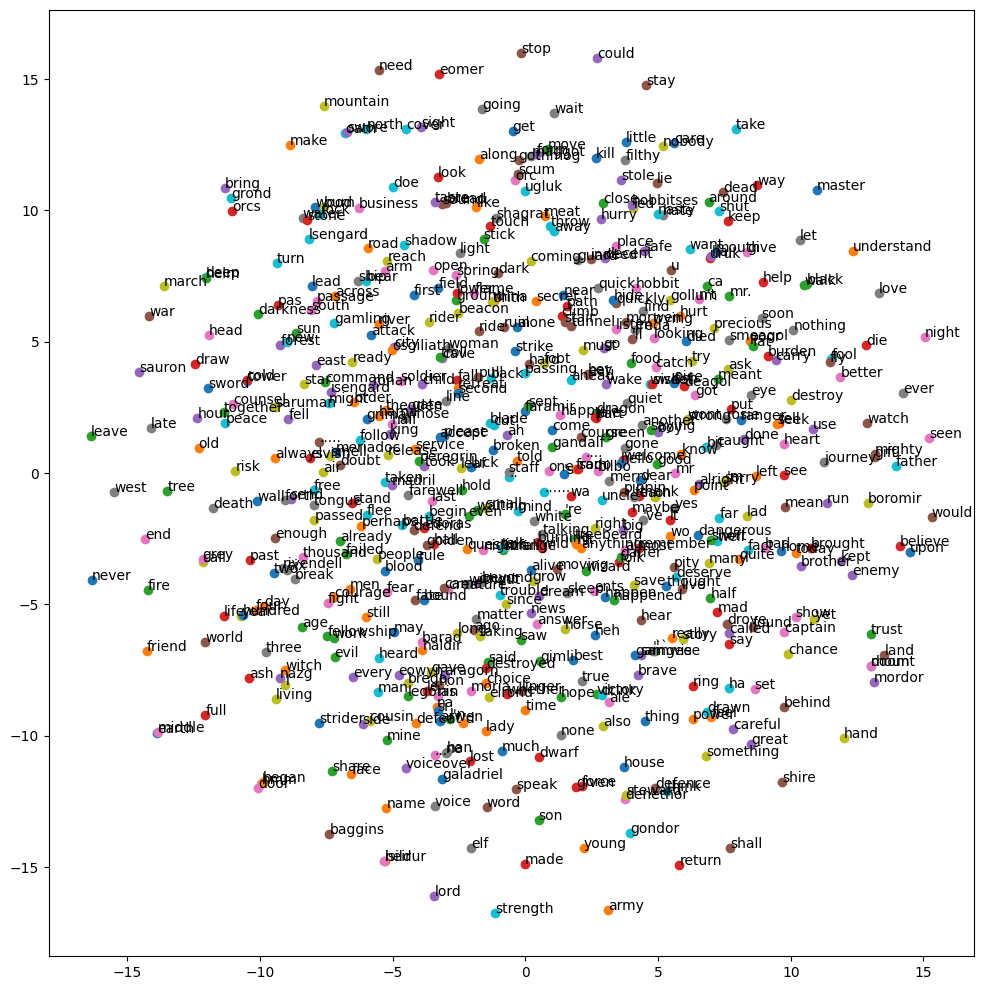

In [135]:
plt.figure(figsize=(10, 10))
for i, label in enumerate(labels):
    x, y = vectors2d[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y))

plt.tight_layout()
plt.show()

_También utilizamos Seaborn para visualizar un espacio reducido:_


🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Grafica un subconjunto de embbedings en 2 dimensiones utilizando Seaborn</font></em>


In [136]:
def plot_embeddings_seaborn(vectors2d, labels, num_points=30):
    # Seleccionar un subconjunto aleatorio de las palabras para mejor visualización
    idx = np.random.choice(len(labels), size=num_points, replace=False)
    selected_vectors = vectors2d[idx]
    selected_labels = np.array(labels)[idx]

    # Crear un DataFrame con las coordenadas x, y y las etiquetas de las palabras
    df = pd.DataFrame(
        {
            "x": selected_vectors[:, 0],
            "y": selected_vectors[:, 1],
            "label": selected_labels,
        }
    )

    # Crear el gráfico utilizando seaborn
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x="x", y="y", data=df)

    # Añadir las etiquetas a cada punto
    for i in range(len(df)):
        plt.text(df["x"].iloc[i], df["y"].iloc[i], df["label"].iloc[i], fontsize=12)

    plt.title("Visualización de un subconjunto de embeddings")
    plt.show()

_Realizamos la gráfica:_


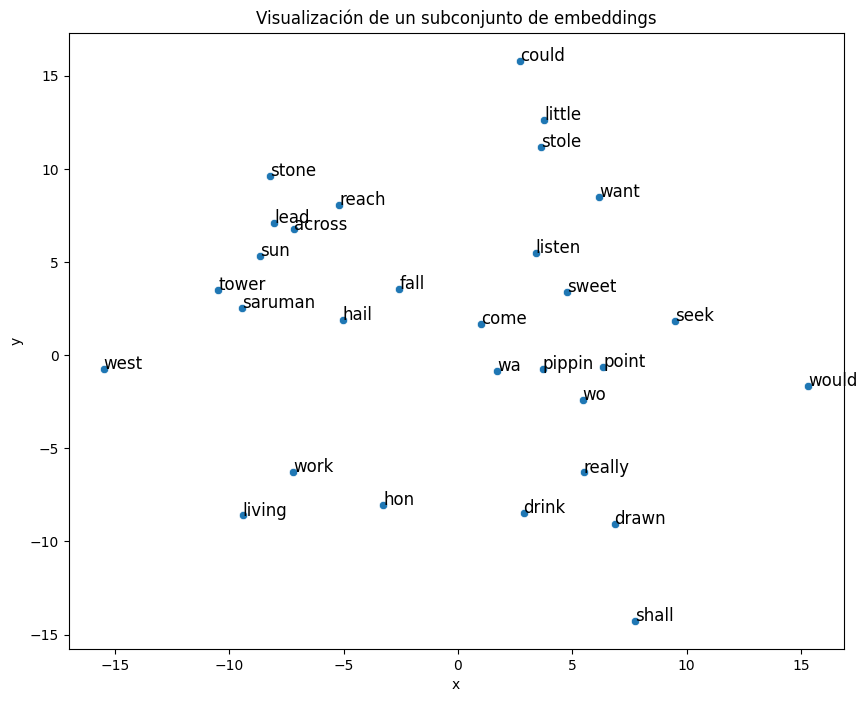

In [137]:
# Graficar solo un subconjunto de 30 tokens
plot_embeddings_seaborn(vectors2d, labels, num_points=30)

_Finalmente, utilizamos plotly, que mejora la visualización:_


In [138]:
fig = px.scatter(
    x=vectors2d[:GRAPH_MAX_WORDS, 0],
    y=vectors2d[:GRAPH_MAX_WORDS, 1],
    text=labels[:GRAPH_MAX_WORDS],
)
fig.show()

_También realizamos el gráfico en 3D para mejor visualización._


_Inicialmente, reducimos la dimensionalidad en 3 dimensiones:_


In [139]:
vectors3d, labels = reduce_dimensions(w2v_model, 3)

_Realizamos la gráfica en 3D:_


In [140]:
fig = px.scatter_3d(
    x=vectors3d[:GRAPH_MAX_WORDS, 0],
    y=vectors3d[:GRAPH_MAX_WORDS, 1],
    z=vectors3d[:GRAPH_MAX_WORDS, 2],
    text=labels[:GRAPH_MAX_WORDS],
)
fig.update_traces(marker_size=2)
fig.show()

#### PCA


_En vez de utilizar TSNE, que es un algoritmo estocástico no lineal, que intenta mantener la proximidad relativa de los puntos (util para relaciones locales entre tokens) podemos utilizar un algoritmo determinista lineal como PCA y realizar gráficos similares:_


🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Reduce la dimensionalidad aplicando PCA.</font></em>


In [141]:
def reduce_dimensions_pca(model, num_dimensions=2):
    # Extrae los vectores del modelo (tamaño vocabulario, dimensión original).
    vectors = np.asarray(model.wv.vectors)
    # Extrae los tokens correspondientes a los vectores
    labels = np.asarray(model.wv.index_to_key)

    # Creamos el modelo PCA
    pca = PCA(n_components=num_dimensions)

    # Transforma los vectores a (tamaño vocabulario, num_dimensions)
    vectors = pca.fit_transform(vectors)

    return vectors, labels

_Realizamos la misma gráfica con matplotlib._


_Inicialmente, reducimos la dimensionalidad con PCA:_


In [142]:
vectors2d, labels = reduce_dimensions_pca(w2v_model)

_Graficamos:_


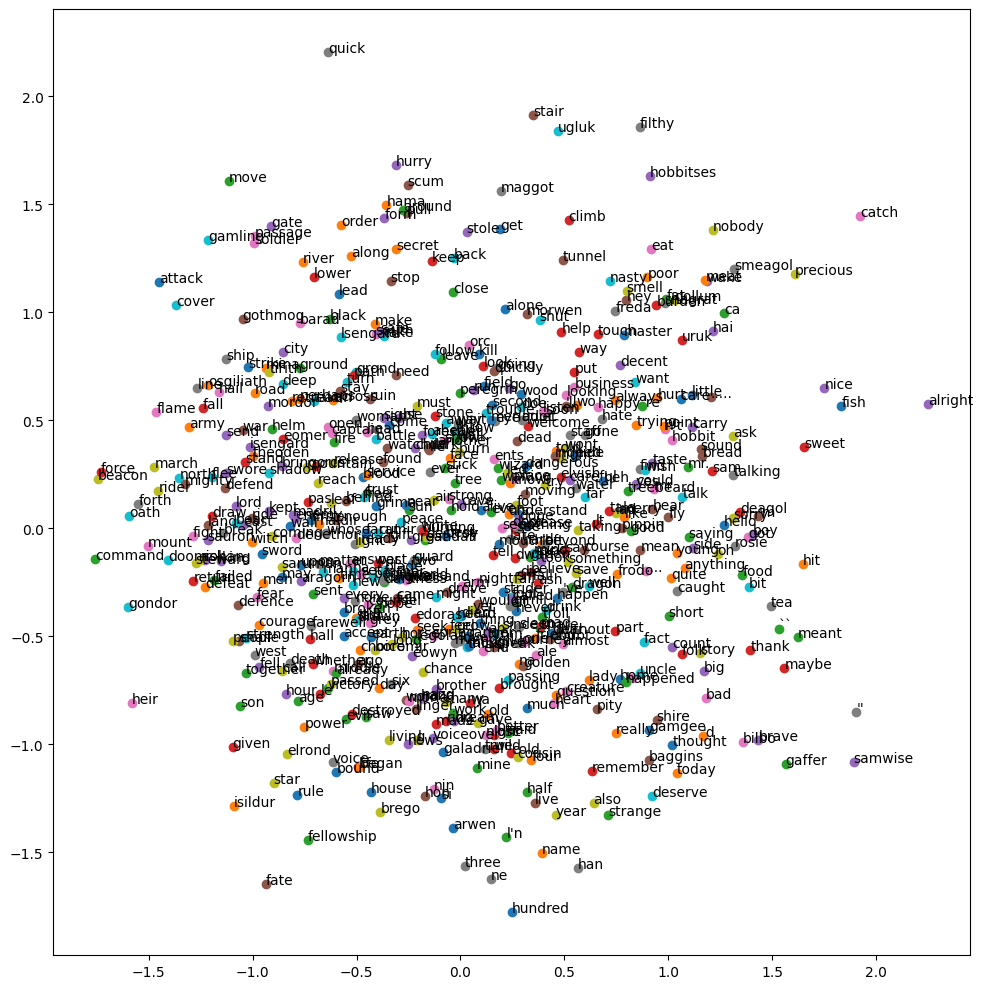

In [143]:
plt.figure(figsize=(10, 10))
for i, label in enumerate(labels):
    x, y = vectors2d[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y))

plt.tight_layout()
plt.show()

⭐ <em><strong>Conclusión</strong></em> ⭐

<em><strong><p>

Como conclusión entre los gráficos, podemos ver que hay tokens que aparecen "cerca" en ambos casos, tanto como PCA y como TSNE.

Como ejemplo, podemos ver que en PCA "heir" aparece bastante cerca de "isildur", y en TSNE aparecen casi solapados, indicando una clara cercanía. En este punto capaz sería lógico que aparezca también "Aragorn" cerca, pero no se pudo encontrar.

Otro ejemplo más, es la cercanía de "Smeagol" y "precious", también en ambos casos.

</p></strong></em>


### Parte 4


> Obtener conclusiones.


⭐ <em><strong>Conclusión</strong></em> ⭐

<em><strong><p>

Como conclusión final, vemos que el modelo retiene relaciones simples, pero no maneja relaciones complejas como las expresadas antes. Esto podría deberse a varios motivos, vinculados al modelo como también al corpus.

</p></strong></em>


⚠️ <em><font color='gold'>Problemas detectados:</font></em>
<em><font color='gold'><p>

- Hay bastante ruido, en las gráficas podemos ver que aparecen palabras como: "hello", "poor", "hey"; que pueden generar ruido entre otros.
- El tamaño del corpus es tamaño pequeño, hay solamente 2000 documentos, los cuales no son extensos ya que son sentencias de las peliculas.
- Al ser sentencias de las peliculas, puede que no expresen muy bien la semántica (como el ejemplo de "Gandalf", que no se logra captar las relaciones jerárquicas)

</p></font></em>


💫 <em><font color='MediumPurple'> Mejoras posibles: </font></em>
<em><font color='MediumPurple'><p>

- Realizar el análisis utilzando todos los textos del señor de los anillos, los cuales expresan mejor la semántica de la obra que solamente en sentencias de las películas (https://github.com/jblazzy/LOTR)
- Probar cambiando la ventana del modelo. En este caso se utilizó 3, ya que con 2 no había dado buena efectividad, sin embargo, quedó oportunidad de probar otros valores.
- Se utilizó el método de skipgram, pero queda como oportunidad probar CBOW, así cmo también otros parámetros de entrenamiento del modelo como `min_count` y `negative`.

</p></font></em>
